# Imports

In [7]:
import numpy as np
import data
from kmeans import KmeansClustering
from evaluator import Evaluator
from plotter import Plotter

# Reading Data

In [2]:
dataLoader = data.DataLoader()

pure_dataset = dataLoader.get_pure_data()
solution_a_dataset = dataLoader.get_modified_data_solution_a()
solution_b_dataset_before_projection = dataLoader._get_modified_data_solution_b_before_projection()
solution_b_dataset = dataLoader.get_modified_data_solution_b()
x_train, y_train, x_test, y_test = dataLoader.get_splitted_data(solution_a=True)
x_train2, y_train2, x_test2, y_test2 = dataLoader.get_splitted_data(solution_a=False)

print(f"Pure Dataset Dims:                           {pure_dataset.shape}")
print(f"Solution A Dataset Dims:                     {solution_a_dataset.shape}")
print(f"Solution B (before projection) Dataset Dims: {solution_b_dataset_before_projection.shape}")
print(f"Solution B (after projection) Dataset Dims:  {solution_b_dataset.shape}\n")
print(f"Train and Test Splits (solution A) Dims:  \n"
      f"\tx_train.shape =              {x_train.shape}\n"
      f"\ty_train.shape =              {y_train.shape}\n"
      f"\tx_test.shape =               {x_test.shape}\n"
      f"\ty_test.shape =               {y_test.shape}\n")
print(f"Train and Test Splits (solution B) Dims:  \n"
      f"\tx_train.shape =              {x_train2.shape}\n"
      f"\ty_train.shape =              {y_train2.shape}\n"
      f"\tx_test.shape =               {x_test2.shape}\n"
      f"\ty_test.shape =               {y_test2.shape}\n")

Pure Dataset Dims:                           (9120, 125, 45)
Solution A Dataset Dims:                     (9120, 45)
Solution B (before projection) Dataset Dims: (9120, 5625)
Solution B (after projection) Dataset Dims:  (9120, 654)

Train and Test Splits (solution A) Dims:  
	x_train.shape =              (7296, 45)
	y_train.shape =              (7296,)
	x_test.shape =               (1824, 45)
	y_test.shape =               (1824,)

Train and Test Splits (solution B) Dims:  
	x_train.shape =              (7296, 654)
	y_train.shape =              (7296,)
	x_test.shape =               (1824, 654)
	y_test.shape =               (1824,)


# Kmeans

In [5]:
k_values = np.array([8, 13, 19, 28, 38])
solution_a_results = np.zeros((len(k_values), 5))
solution_b_results = np.zeros((len(k_values), 5))

for i in range(len(k_values)):
      # Solution A
      kmeans = KmeansClustering(k_values[i])
      kmeans.fit(x_train)
      
      clusters_test_data = kmeans.predict(x_test)
      evaluator = Evaluator(y_test, clusters_test_data)

      # print(f'{k_values[i]} is running')
      solution_a_results[i, 0] = evaluator.compute_precision()
      solution_a_results[i, 1] = evaluator.compute_recall()
      solution_a_results[i, 2] = evaluator.compute_f1()
      solution_a_results[i, 3] = evaluator.compute_conditional_entropy()
      solution_a_results[i, 4] = evaluator.computer_accuracy()
      

      # Solution B
      kmeans = KmeansClustering(k_values[i])
      kmeans.fit(x_train2)

      clusters_test_data = kmeans.predict(x_test2)
      evaluator = Evaluator(y_test2, clusters_test_data)

      # print(f'{k_values[i]} is running in second solution')
      solution_b_results[i, 0] = evaluator.compute_precision()
      solution_b_results[i, 1] = evaluator.compute_recall()
      solution_b_results[i, 2] = evaluator.compute_f1()
      solution_b_results[i, 3] = evaluator.compute_conditional_entropy()
      solution_b_results[i, 4] = evaluator.computer_accuracy()
      

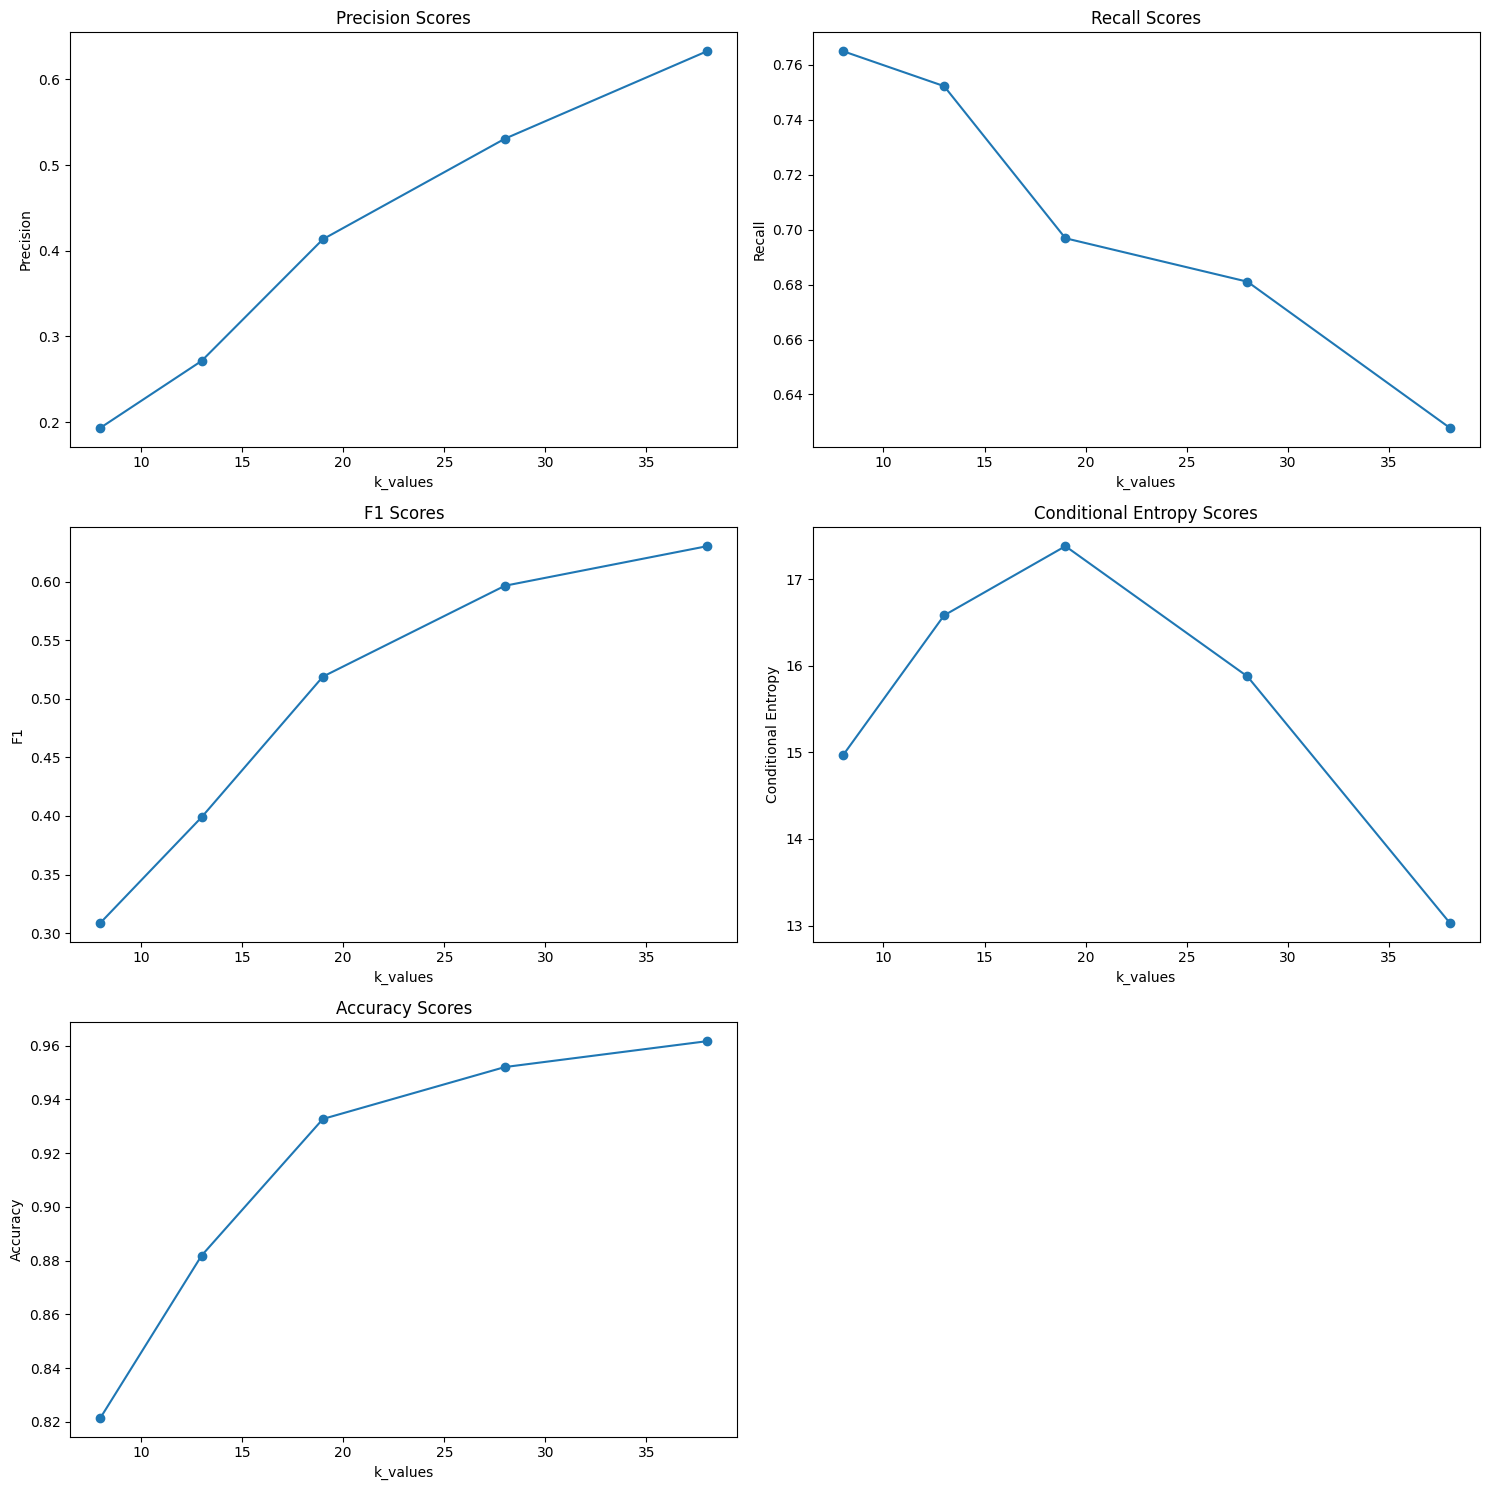

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.193442 | 0.764935 | 0.308794 |               14.9662 |   0.821544 |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.271438 | 0.752205 | 0.398923 |               16.5822 |   0.881874 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.41351  | 0.696849 | 0.519029 |               17.3816 |   0.932697 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.530854 | 0.681036 | 0.59664  |               15.8768 |   0.952014 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.633022 | 0.6

In [8]:
# Solution A
plotter_solution_a = Plotter(k_values, solution_a_results[:, 0], solution_a_results[:, 1], solution_a_results[:, 2], 
                             solution_a_results[:, 3], solution_a_results[:, 4])
plotter_solution_a.plot_scores()
plotter_solution_a.tabulate_scores()

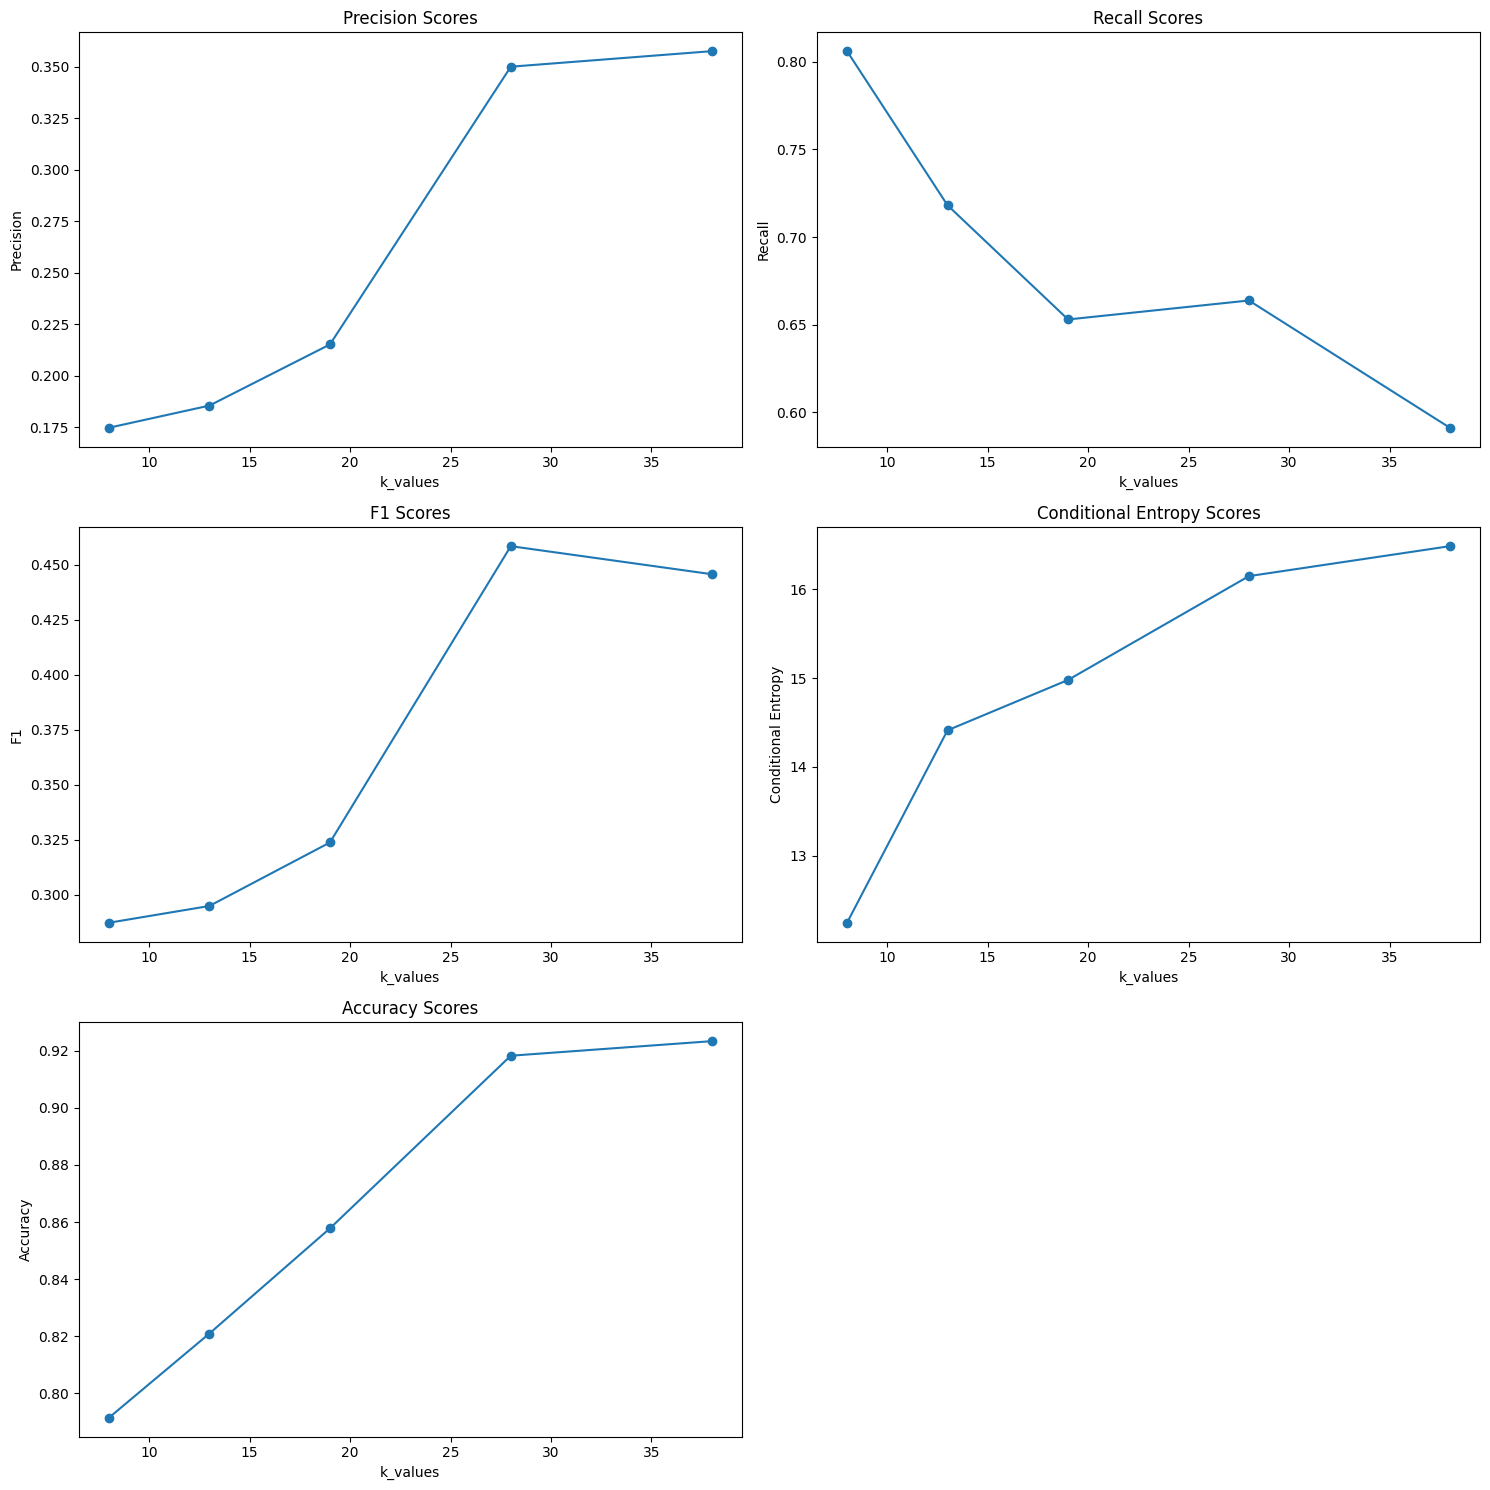

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.174723 | 0.806048 | 0.287192 |               12.2437 |   0.79149  |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.185485 | 0.718133 | 0.294821 |               14.4124 |   0.820975 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.215183 | 0.652966 | 0.323693 |               14.9801 |   0.85781  |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.35006  | 0.663781 | 0.458382 |               16.15   |   0.918256 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.357607 | 0.5

In [9]:
# Solution B
plotter_solution_b = Plotter(k_values, solution_b_results[:, 0], solution_b_results[:, 1], solution_b_results[:, 2],
                             solution_b_results[:, 3], solution_b_results[:, 4])
plotter_solution_b.plot_scores()
plotter_solution_b.tabulate_scores()